 Natūralios atrankos poveikis - DI ar žmonės pranašesni? 
================================================ 
 



**Danielius Kundrotas**

Optimizavimas gradientu
=====================


$$F(\text{parametrai}) = \sum_{\text{input}}f(\text{input},\text{parametrai})$$


$$\text{nauji_parametrai} = \text{parametrai} - \text{mokymosi_sparta}*\nabla F(parametrai)$$

<figure>
    <img src="images/grad.png" style="width:80%">
    <figcaption align = "center">  </figcaption>
</figure>


Adaptyvumo funkcija:
------------------------

 1. gyvio_tankis - vandens_tankis

 2. tūris / paviršiaus plotas

 3. gyvio miego ilgis - nakties ilgis


  

$$F( \text{gyvio parametrai} )=(1)^2+(2)^2+(3)^2$$

Ar aplinka keičiasi?
----------------------------
- Nesikeičia
- Keičiasi lėtai
- Keičiasi greitai

In [7]:
import numpy as np
import matplotlib.pyplot as plt


#Gyvio_APLINKA(gyvio_parametrai) =
#[gyvio_tankis, gyvio_tūris, gyvio_paviršiaus_plotas, gyvis_miega]
#gyvis_pradinis = [5, 23, 1, 4]

#gyviui reikia būti greitesniam už plėšrūną, bet
#didesnis greitis jam kainuoja judėjimo efektyvumu
#gyvio_greitis - (plėšrūno_greitis + 1) = 0

##gtan - APLINKA[0])**2+(gturis / gpp)**2 
#         + (APLINKA[2] / gturis)**2
 #        + (gmi - APLINKA[1])**2
#


def printGyvis(gyvis, gyvis2, kartu):
    gyvis = np.array(gyvis, dtype=np.float32)
    print("Pradinis Gyvis {kartu} kartų ==> Evoliucionavęs gyvis \n")
    print(f"gyvio_tankis            = {gyvis[0]:2.2f} ==> {gyvis2[0]:2.2f}")
    print(f"gyvio_tūris             = {gyvis[1]:2.2f} ==> {gyvis2[1]:2.2f}")
    print(f"gyvio_paviršiaus_plotas = {gyvis[2]:2.2f} ==> {gyvis2[2]:2.2f}")
    print(f"gyvis_miega             = {gyvis[3]:2.2f} ==> {gyvis2[3]:2.2f}h\n")



Papraščiausia implementacija
-----------------------------

In [197]:
#Gyvio 1/vertingumo funkcija
def F(g):

    eilute_1 = g[0] - APLINKA[0]
    eilute_2 = g[1] / g[2]
    eilute_3 = g[3] - APLINKA[1]

    return eilute_1**2 + eilute_2**2 + eilute_3**2


#Gradientas
def gradF(g):
    return np.array([
        2 * (g[0] - APLINKA[0]),
        2 * (g[1] / g[2]),
        -2 * (g[1]**2) / g[2]**3,
        2 * (g[3] - APLINKA[1])
    ])


In [229]:
#labels = [gyvio_tankis, gyvio_tūris, gyvio_paviršiaus_plotas, gyvio_miego_laikas]
gyvis_pradinis = [10, 6, 2, 30]
#gyvis_pradinis = [42, 123,14523,23]
gyvis_senas = gyvis_pradinis


#APLINKA = [vandens_tankis, nakties_ilgis]
APLINKA = [1, 12]

mkarta = 0
gg = [[]]
ggloss = [[]]

In [199]:
sparta = 0.01 #speju galime traktuoti, kaip tikimybe neisgyventi

print(f"pradinis adaptyvumas = {1/F(gyvis_senas):2.2f}, karta = 0 ")


for karta in range(100):
    
    gyvis_naujas = gyvis_senas - sparta * gradF(gyvis_senas)
    
    gyvis_senas  = gyvis_naujas

    if karta % (20) == 0:
        print(f"adaptyvumas = {1/F(gyvis_naujas):2.2f}, karta = {karta+mkarta}")
    
    gg.append(gyvis_senas)
    ggloss.append(1/F(gyvis_naujas))
    
    
mkarta +=100

pradinis adaptyvumas = 0.00, karta = 0 
adaptyvumas = 0.00, karta = 0
adaptyvumas = 0.00, karta = 20
adaptyvumas = 0.00, karta = 40
adaptyvumas = 0.01, karta = 60
adaptyvumas = 0.01, karta = 80


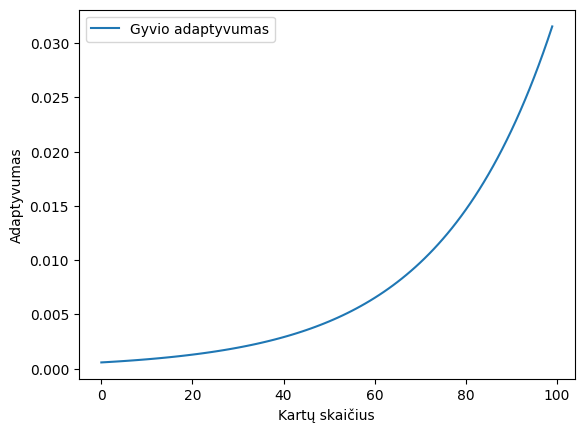

In [200]:
plt.plot(ggloss[1:], label = "Gyvio adaptyvumas")
plt.ylabel('Adaptyvumas')
plt.xlabel('Kartų skaičius')
plt.legend()

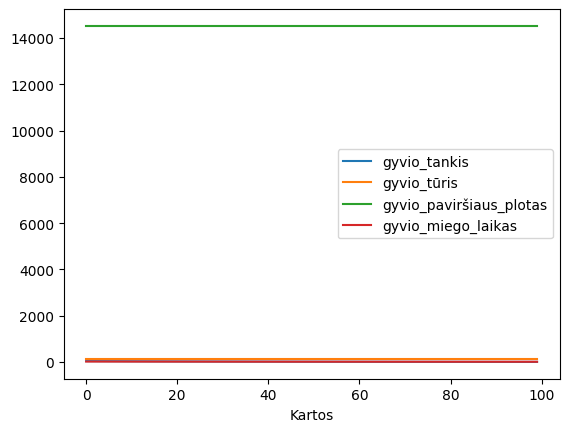

In [201]:
labelso = ["gyvio_tankis", "gyvio_tūris", "gyvio_paviršiaus_plotas", "gyvio_miego_laikas"]
ggg = np.array(gg[1:])
#plt.figure(figsize=(10,6))
for i in range(len(gyvis_pradinis)):
    plt.plot(ggg.transpose()[i], label = labelso[i])
plt.xlabel("Kartos")
plt.legend()


In [202]:
printGyvis(gyvis_pradinis, gyvis_naujas, mkarta)
print(f"\n APLINKA: \n   vandens_tankis = {APLINKA[0]}\n   nakties_ilgis = {APLINKA[1]}h")

Pradinis Gyvis {kartu} kartų ==> Evoliucionavęs gyvis 

gyvio_tankis            = 42.00 ==> 6.44
gyvio_tūris             = 123.00 ==> 122.98
gyvio_paviršiaus_plotas = 14523.00 ==> 14523.00
gyvis_miega             = 23.00 ==> 13.46h


 APLINKA: 
   vandens_tankis = 1
   nakties_ilgis = 12h



<figure>
    <img src="images/grad3.png" style="width:80%">
    <figcaption align = "center"> </figcaption>
</figure>

Pridėkime plėšrūną!
-----------------------------
 a. gyvio greitis - (plėšrūno greitis)*1.1

    
$$F( \text{gyvio parametrai} )=(1)^2+(2)^2+(3)^2 + (a)^2$$


b. (gyvio greitis) - (plėšrūno greitis)*0.5

    
$$H( \text{plėšrūno parametrai} )=(1)^2+(2)^2+(3)^2 + (b)^2$$

In [242]:
#Gyvio 1/vertingumo funkcija
def F(g,p):

    eilute_1 = g[0] - APLINKA[0]
    eilute_2 = g[1] / g[2]
    eilute_3 = g[3] - APLINKA[1]
    eilute_5 = (g[4] - p[4]*1.1)

    return eilute_1**2 + eilute_2**2 + eilute_3**2 + eilute_5**2


#Gradientas
def gradF(g,p):
    return np.array([
        2 * (g[0] - APLINKA[0]),
        2 * (g[1] / g[2])*p[1],
        -2 * (g[1]**2) / g[2]**3,
        2 * (g[3] - APLINKA[1]),   
        
        2 * (g[4]-p[4]*1.1)
    ])

In [243]:
#plesruno loss
def H(g, p):
    eilute_1 = p[0] - APLINKA[0]
    eilute_2 = p[1] / p[2]
    eilute_3 = p[3] - APLINKA[1]
    
    eilute_5 = (g[4] - p[4])
    
    return eilute_1**2 + eilute_2**2 + eilute_3**2 + eilute_5**2

#plesruno gradientas
def gradH(g,p):
    return np.array(
        [2 * (p[0] - APLINKA[0]),
         2 * (p[1] / p[2]),
        -2 * (p[1]**2) / p[2]**3,        
         2 * (p[3] - APLINKA[1]),
         
        -2 * (g[4] - p[4]/2)])

In [244]:
#[gyvio_tankis, gyvio_tūris, gyvio_paviršiaus_plotas, gyvio_miego_laikas, gyvio_greitis]
#gyvis_pradinis = [100, 100, 42, 0, 5]

gyvis_pradinis   = [0.3, 3, 2, 32, 2]
g_senas = gyvis_pradinis

#plėšrūno tūris, plėšrūno greitis
plėšrūnas_pradinis = [14, 5, 4, 3, 3]
p_senas = plėšrūnas_pradinis

#APLINKA = [vandens_tankis, nakties_ilgis]
APLINKA = [1, 12]


mkarta = 0
#gyvio loss 
ggloss = []
#plesruno
pploss = []
gg = [[]]
pp = [[]]

In [245]:
sparta = 0.01 #speju galime traktuoti, kaip tikimybe neisgyventi

print(f"pradinis adaptyvumas = {1/F(g_senas, p_senas):2.2f}, karta = 0 ")


KARTOS = 100
for karta in range(KARTOS):
    
    g = g_senas - sparta *gradF(g_senas, p_senas)
    
    p = p_senas - sparta *gradH(g_senas, p_senas )
    
    
    
    gloss = F(g, p)
    ploss = H(g, p)
    
    ggloss.append(1/gloss)
    pploss.append(1/ploss)
    
    if karta% (KARTOS/10) ==0:
        print(f"gyvio adaptyvumas = {1/gloss:2.2f}, plėšrūno adaptyvumas = {1/ploss:2.2f}, karta = {karta+mkarta}")
        
    
    g_senas = g
    p_senas = p 
    
    gg.append(g)
    pp.append(p)
    
mkarta += KARTOS

pradinis adaptyvumas = 0.00, karta = 0 
gyvio adaptyvumas = 0.00, plėšrūno adaptyvumas = 0.00, karta = 0
gyvio adaptyvumas = 0.00, plėšrūno adaptyvumas = 0.01, karta = 10
gyvio adaptyvumas = 0.01, plėšrūno adaptyvumas = 0.01, karta = 20
gyvio adaptyvumas = 0.01, plėšrūno adaptyvumas = 0.01, karta = 30
gyvio adaptyvumas = 0.01, plėšrūno adaptyvumas = 0.02, karta = 40
gyvio adaptyvumas = 0.02, plėšrūno adaptyvumas = 0.03, karta = 50
gyvio adaptyvumas = 0.03, plėšrūno adaptyvumas = 0.04, karta = 60
gyvio adaptyvumas = 0.04, plėšrūno adaptyvumas = 0.06, karta = 70
gyvio adaptyvumas = 0.06, plėšrūno adaptyvumas = 0.09, karta = 80
gyvio adaptyvumas = 0.08, plėšrūno adaptyvumas = 0.13, karta = 90


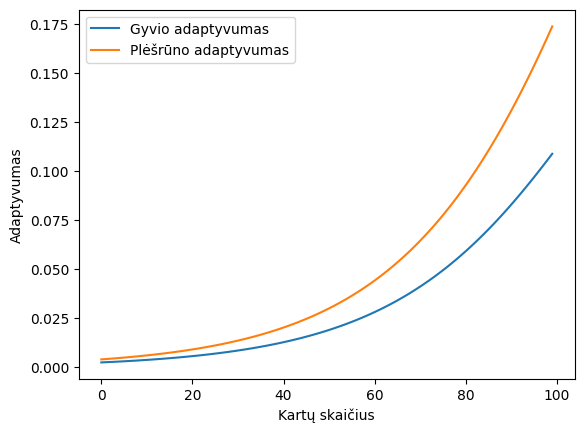

In [254]:
#plot
plt.plot(ggloss, label = "Gyvio adaptyvumas")
plt.plot(pploss, label = "Plėšrūno adaptyvumas")
plt.ylabel('Adaptyvumas')
plt.xlabel('Kartų skaičius')
plt.legend()
#for i,j in zip(p,g):
    #print(f"{i:2.2f} {j:2.2f}")
a=1 #kad nemestu plt return ant ekrano

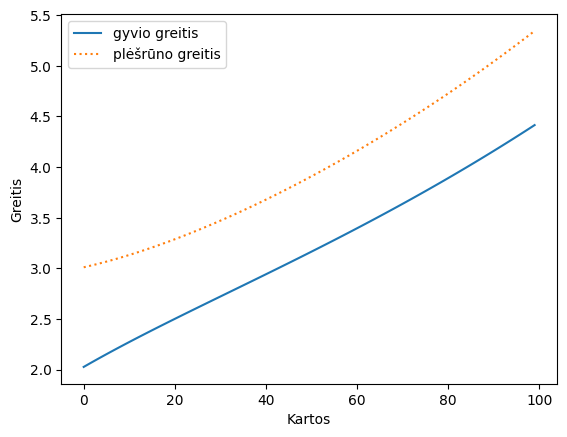

In [253]:
#plot
ggg = np.array(gg[1:]).transpose()
ppp = np.array(pp[1:]).transpose()
glabels = ["gyvio_tankis", "gyvio_tūris", "gyvio_paviršiaus_plotas", "gyvio_miego_laikas", "gyvio greitis"]
plabels = ["P_tankis",'plėšrūno tūris', "P_paviršiaus_plotas","P_miego_laikas",'plėšrūno greitis' ]
#plt.figure(figsize=(10,6))
plt.plot(np.abs(ggg[4]), label = glabels[4])
plt.plot(ppp[4], label = plabels[4], linestyle='dotted')
plt.legend()
plt.ylabel('Greitis')
plt.xlabel("Kartos")
a =2

Apibendrintas Darvinas
======================

* Variacija
* Išsilaikymas
* Išskiriantis _adaptyvumas_ (fitness)

<img src="images/monkeys.png" width="400" align ="center" >
<img src="images/gene.jpg" width="400" align ="center" >
<img src="images/lions.png" width="400"  align="center">

<img src="images/kvariacija.jpg" width="400" align ="center" >
<img src="images/kgenes2.png" width="400" align ="center" >
<img src="images/kfit.jpg" width="400"  align="center">

DI
==

1. Variacija?

2. Išsilaikymas?

3. Išskiriantis adapatyvumas?

DI Progresas
=============

<img src="images/mips.png" width="900"  align="center">

<img src="images/flops.png" width="900"  align="center">

<img src="singularity.gif" width="750" align="center">

<img src="images/aikopernikas.png" width="100%"  align="center"  alt="Koperniko revoliucija žmonių intelektui">



## Bibliografija:
    1. Hendrycks, Dan: Natural Selection Favors AIs over Humans, in: arXiv.org, 28.03.2023.
    
    1.1 https://aiimpacts.org/trends-in-the-cost-of-computing/
    
    2. „When will computer hardware match the human brain? , Hans Moravec, 1998
    
    3. Wikipedia contributors: Universal Darwinism, in: Wikipedia, 18.11.2023, [online] 
    
    4. https://www.nature.com/articles/361489b0.pdf
    
    3. PAUL cristiano
    
    4. tedmark new life
    5. evolution proves we're stupid, and we are interacting with interface not reality 
   
    6. Sapiens Yuval Noah Harrari